In [1]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.backends.backend_pdf import PdfPages
import import_ipynb

from common import *
from euler_method import solve_euler as euler
from RK4 import RK4 as RK4
from Adams import solve_adams as adams

importing Jupyter notebook from euler_method.ipynb
importing Jupyter notebook from RK4.ipynb
importing Jupyter notebook from Adams.ipynb


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def calculate(t0=0, x0=13.41265629, y0=13.46430003, z0=33.46156416):
    return [{ 'euler': euler(r, t0, x0, y0, z0),
              'RK4': RK4(r, t0, x0, y0, z0),
              'adams': adams(r, t0, x0, y0, z0)
            }
            for r in rs]

In [4]:
def draw_2D(results):
    pp = PdfPages('2D-graphics.pdf')
    for i in range(len(rs)):
        cur_result = results[i]
        r = rs[i]
        
        ts0, xs0, ys0, zs0 = cur_result['euler']
        ts1, xs1, ys1, zs1 = cur_result['RK4']
        ts2, xs2, ys2, zs2 = cur_result['adams']

        fig = plt.figure()
        plt.title('r = {0}'.format(r))
        plt.plot(ts0, xs0, label='euler')
        plt.plot(ts1, xs1, label='RK4')
        plt.plot(ts2, xs2, label='adams')
        plt.xlabel('t')
        plt.ylabel('x')
        plt.legend(loc=(1.04,0))
        pp.savefig(fig)
        
        fig = plt.figure()
        plt.title('r = {0}'.format(r))
        plt.plot(ts0, ys0, label='euler')
        plt.plot(ts1, ys1, label='RK4')
        plt.plot(ts2, ys2, label='adams')
        plt.xlabel('t')
        plt.ylabel('y')
        plt.legend(loc=(1.04,0))
        pp.savefig(fig)
        
        fig = plt.figure()
        plt.title('r = {0}'.format(r))
        plt.plot(ts0, zs0, label='euler')
        plt.plot(ts1, zs1, label='RK4')
        plt.plot(ts2, zs2, label='adams')
        plt.xlabel('t')
        plt.ylabel('z')
        plt.legend(loc=(1.04,0))
        pp.savefig(fig)
    pp.close()

In [5]:
def draw_3D(results, solve_name):
    for i in range(len(rs)):
        cur_result = results[i]
        r = rs[i]

        ts, xs, ys, zs = cur_result[solve_name]
        
        fig = go.Figure(
                data=[
                    go.Scatter3d(
                        x=xs,
                        y=ys,
                        z=zs,
                        marker=go.Marker(
                            size=1
                        )
                    )
                ]
        )
        fig.show()

In [6]:
results = calculate()

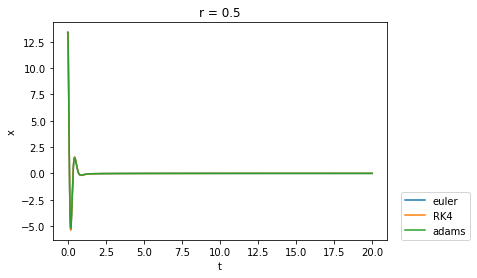

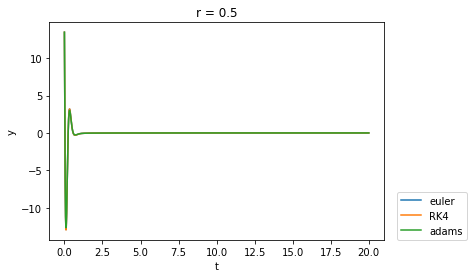

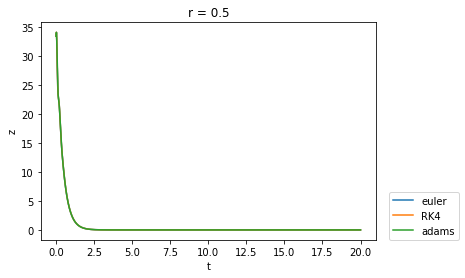

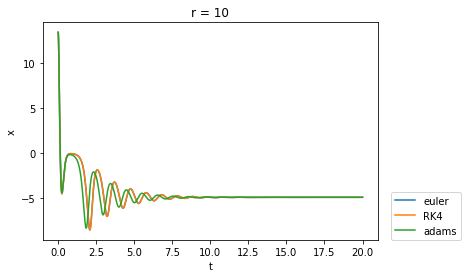

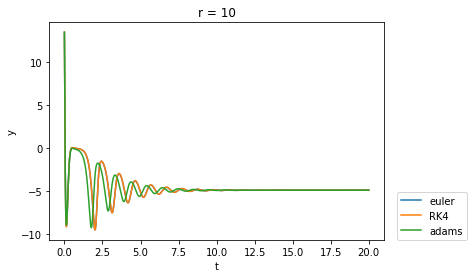

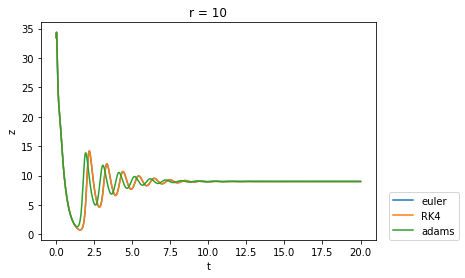

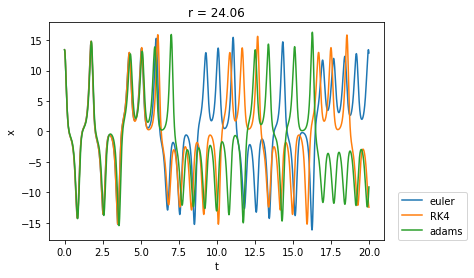

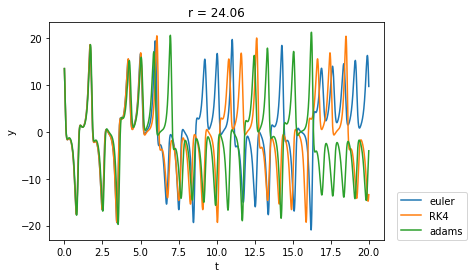

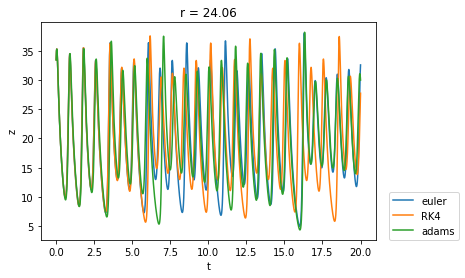

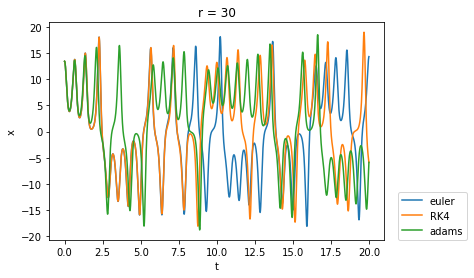

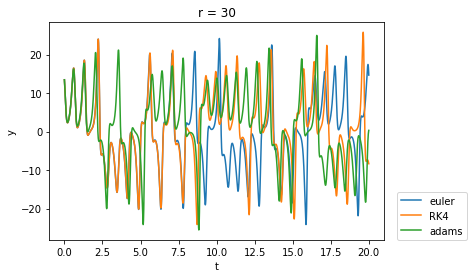

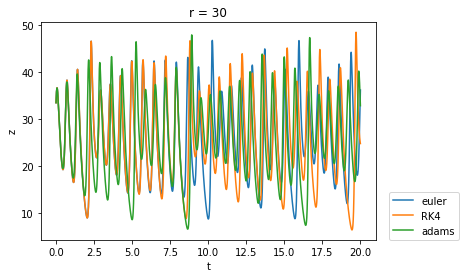

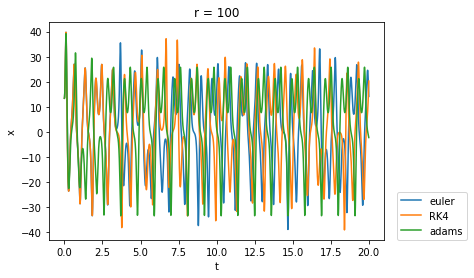

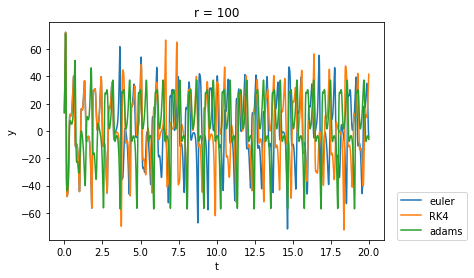

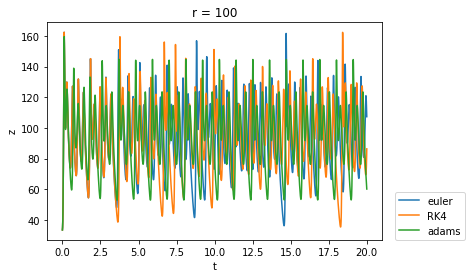

In [7]:
draw_2D(results)

In [ ]:
# draw_3D(results, 'euler')

In [ ]:
# draw_3D(results, 'RK4')

In [ ]:
# draw_3D(results, 'adams')